In [1]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark 

In [2]:
  V, E = mesh.load_raw('data/ForwardDesign/hinge.obj')
  fusedPts = list(np.loadtxt('data/ForwardDesign/fusehingev3.txt').reshape((-1, 2)))
  holePts = []  # or load from file if you want, but it should be empty

In [3]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

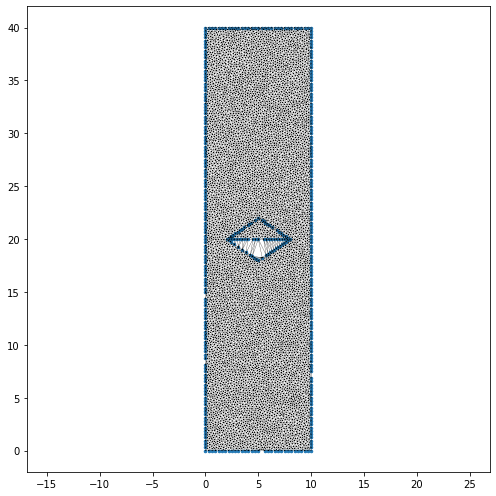

In [4]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))

viewer = Viewer(isheet, wireframe=True)
viewer.show()

In [5]:
import time
import benchmark
import py_newton_optimizer

benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1

# If you want to see the inflation progress in the viewer:
framerate = 5  # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()

cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.00371599	1
Newton iterations	79.2283	1
    InflatableSheet energy	0.000961065	1
    Newton iterate	79.2269	115
        Backtracking	0.571183	114
            InflatableSheet energy	0.105335	170
            InflatableSheet setVars	0.457081	170
        Compute descent direction	76.6955	114
            Negative curvature dir	0.185425	3
                negativeCurvatureDirection	0.179625	3
                    CHOLMOD Backsub	0.125018	51
                    CHOLMOD Numeric Factorize	0.00265169	3
                    CHOLMOD Symbolic Factorize	0.0287988	3
            newton_step	76.5093	114
                Newton solve	73.1809	194
                    CHOLMOD Numeric Factorize	71.0565	193
                    Solve	1.26788	115
                        CHOLMOD Backsub	0.983924	114
                        CHOLMOD Numeric Factorize	0.0668581	1
                        CHOLMOD Symbolic Factorize	0.201277	1
                hessEval	3.15628	114
                largestMagnitudeE

In [6]:
from tri_mesh_viewer import TriMeshViewer as Viewer
viewer = Viewer(isheet, wireframe=True)
viewer.show() 

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

Step-by-step: Save Inflation Video

In [7]:
#Create the InflatableSheet and the Offscreen Viewer:
from tri_mesh_viewer import OffscreenTriMeshViewer
isheet = inflation.InflatableSheet(m, iwv)  # or use np.array(iwv) != 0 if needed
oview = OffscreenTriMeshViewer(isheet, width=768, height=640, wireframe=True)

In [8]:
#Set up the optimizer and start recording
import benchmark
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 1000  # or your preferred number of iterations

benchmark.reset()
oview.recordStart('hingev3.mp4')  # Output video filename
isheet.pressure = 1  # Adjust pressure as needed

In [9]:
#Run the simulation and update the viewer:
cr = inflation.inflation_newton(
    isheet,
    isheet.rigidMotionPinVars,
    opts,
    callback=lambda it: oview.update()
)
benchmark.report()
oview.recordStop()

InflatableSheet setVars	0.00293803	1
Newton iterations	91.318	1
    InflatableSheet energy	0.000445127	1
    Newton iterate	91.3171	115
        Backtracking	0.565042	114
            InflatableSheet energy	0.102645	167
            InflatableSheet setVars	0.453353	167
        Compute descent direction	80.3125	114
            Negative curvature dir	0.204031	3
                negativeCurvatureDirection	0.194291	3
                    CHOLMOD Backsub	0.134904	51
                    CHOLMOD Numeric Factorize	0.00265098	3
                    CHOLMOD Symbolic Factorize	0.0294609	3
            newton_step	80.1076	114
                Newton solve	76.2658	194
                    CHOLMOD Numeric Factorize	74.3951	193
                    Solve	1.31431	115
                        CHOLMOD Backsub	1.03681	114
                        CHOLMOD Numeric Factorize	0.0561671	1
                        CHOLMOD Symbolic Factorize	0.204594	1
                hessEval	3.74987	114
                largestMagnitudeEig

In [10]:
m.save('my_inflated_meshv3.obj')